<a href="https://colab.research.google.com/github/mxngjxa/learning_equality_recommendation/blob/main/learning_equality_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import os

#working_directory = '/home/jacky_macpro/workspaces/project_2/'
#data_directory = os.path.join(working_directory, 'data/')

#drive mounting for timestamping
from google.colab import drive
drive.mount('/content/drive')

data_directory = "/content/drive/MyDrive/Colab Notebooks/DAS 435 Jacky/project_2/"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import math


In [6]:
topics = pd.read_csv(data_directory + 'topics.csv')
correlations = pd.read_csv(data_directory + 'correlations.csv')
content = pd.read_csv(data_directory + 'content.csv')

In [7]:
def explore_curriculum_data(topics_df, content):
    """
    Perform exploratory data analysis on curriculum recommendation datasets

    Parameters:
    topics_df (pd.DataFrame): Topics dataset
    content (pd.DataFrame): Content dataset

    Returns:
    dict: Dictionary containing analysis results
    """
    analysis = {}

    # Basic dataset info
    analysis['topics_shape'] = topics_df.shape
    analysis['content_shape'] = content.shape

    # Check missing values
    analysis['topics_missing'] = topics_df.isnull().sum()
    analysis['content_missing'] = content.isnull().sum()

    # Analyze topics dataset
    analysis['topic_level_counts'] = topics_df['level'].value_counts()
    analysis['topic_language_counts'] = topics_df['language'].value_counts()

    # Analyze content dataset
    analysis['content_language_counts'] = content['language'].value_counts()
    analysis['content_kind_counts'] = content['kind'].value_counts()

    # Calculate text length statistics
    content['title_length'] = content['title'].str.len()
    content['description_length'] = content['description'].fillna('').str.len()

    analysis['content_title_stats'] = content['title_length'].describe()
    analysis['content_desc_stats'] = content['description_length'].describe()

    # Check relationships
    topics_per_language = topics_df.groupby('language').size()
    content_per_language = content.groupby('language').size()
    analysis['topics_to_content_ratio'] = (topics_per_language / content_per_language).fillna(0)

    return analysis

# Run the analysis
results = explore_curriculum_data(topics, content)

# Print key findings
print("Dataset Dimensions:")
print(f"Topics dataset: {results['topics_shape'][0]:,} rows × {results['topics_shape'][1]} columns")
print(f"Content dataset: {results['content_shape'][0]:,} rows × {results['content_shape'][1]} columns\n")

print("Topic Levels Distribution:")
print(results['topic_level_counts'])
print("\nTop 5 Languages by Topic Count:")
print(results['topic_language_counts'].head())
print("\nTop 5 Content Types:")
print(results['content_kind_counts'].head())
print("\nContent Title Length Statistics:")
print(results['content_title_stats'].round(2))

Dataset Dimensions:
Topics dataset: 76,972 rows × 9 columns
Content dataset: 154,047 rows × 8 columns

Topic Levels Distribution:
level
4     38810
3     14898
5      9744
6      6210
2      4874
1      1104
7      1028
0       171
8       119
9        12
10        2
Name: count, dtype: int64

Top 5 Languages by Topic Count:
language
en    36161
es    13910
pt     4177
ar     3701
fr     3701
Name: count, dtype: int64

Top 5 Content Types:
kind
video       61487
document    33873
html5       32563
exercise    25925
audio         199
Name: count, dtype: int64

Content Title Length Statistics:
count    154038.00
mean         33.83
std          18.11
min           1.00
25%          21.00
50%          31.00
75%          44.00
max         177.00
Name: title_length, dtype: float64


In [122]:
topics['category'].unique()

array(['source', 'aligned', 'supplemental'], dtype=object)

In [8]:
print(topics.shape)
topics.head(10)

(76972, 9)


,id,title,description,channel,category,level,language,parent,has_content
0,t_00004da3a1b2,Откриването на резисторите,"Изследване на материали, които предизвикват на...",000cf7,source,4,bg,t_16e29365b50d,True
1,t_000095e03056,Unit 3.3 Enlargements and Similarities,NaN,b3f329,aligned,2,en,t_aa32fb6252dc,False
2,t_00068291e9a4,Entradas e saídas de uma função,Entenda um pouco mais sobre funções.,8e286a,source,4,pt,t_d14b6c2a2b70,True
3,t_00069b63a70a,Transcripts,NaN,6e3ba4,source,3,en,t_4054df11a74e,True
4,t_0006d41a73a8,Графики на експоненциални функции (Алгебра 2 н...,Научи повече за графиките на сложните показате...,000cf7,source,4,bg,t_e2452e21d252,True
5,t_0008768bdee6,100 સુધીનો સરવાળો,37 અને 49 જેવી બે-અંકની સંખ્યાઓ ઉમેરતા શીખો.,5223e0,supplemental,4,gu,t_0da7a331d666,True
6,t_0008a1bd84ba,12. 20: Bird Reproduction,NaN,ebc86c,supplemental,5,en,t_c44ac9711007,True
7,t_000c0c854f0b,Nepal,NaN,f2e966,source,1,en,t_f9c4ef0d6290,False
8,t_000d1fb3f2f5,2.1.2 - Logarithms,NaN,e77b55,aligned,5,en,t_b897d168db90,True
9,t_000feba42136,As vacinas,NaN,8e286a,source,4,pt,t_dfc8ec591573,True


In [9]:
print(content.shape)
content.head(10)

(154047, 10)


,id,title,description,kind,text,language,copyright_holder,license,title_length,description_length
0,c_00002381196d,"Sumar números de varios dígitos: 48,029+233,930","Suma 48,029+233,930 mediante el algoritmo está...",video,NaN,es,NaN,NaN,48.0,53
1,c_000087304a9e,Trovare i fattori di un numero,Sal trova i fattori di 120.\n\n,video,NaN,it,NaN,NaN,30.0,29
2,c_0000ad142ddb,Sumar curvas de demanda,Cómo añadir curvas de demanda\n\n,video,NaN,es,NaN,NaN,23.0,31
3,c_0000c03adc8d,Nado de aproximação,Neste vídeo você vai aprender o nado de aproxi...,document,\nNado de aproximação\nSaber nadar nas ondas ...,pt,Sikana Education,CC BY-NC-ND,19.0,118
4,c_00016694ea2a,geometry-m3-topic-a-overview.pdf,geometry-m3-topic-a-overview.pdf,document,Estándares Comunes del Estado de Nueva York\n\...,es,Engage NY,CC BY-NC-SA,32.0,32
5,c_00019840d110,5.12E: Regulation of the Calvin Cycle,NaN,html5,LEARNING OBJECTIVES\n\nOutline the three major...,en,CSU and Merlot,CC BY-NC-SA,37.0,0
6,c_0001ec56e20f,Reflexionemos sobre lo que vemos y escuchamos,NaN,document,Lección\n\n7\n\nReflexionemos sobre lo que\nve...,es,Publicado por el Lic. Edelberto Andino(edelber...,CC BY-NC-SA,45.0,0
7,c_00025aaa1533,अंग्रेजी ओके प्लीज 1.2,source_url=http://www.prathamopenschool.org/Co...,video,NaN,mr,NaN,NaN,22.0,76
8,c_00027d03ca7d,4.E: Genomes and Chromosomes (Exercises),NaN,html5,4.3\n\n(BPA) Answer the following questions wi...,en,CSU and Merlot,CC BY-NC-SA,40.0,0
9,c_000314eb850f,La banca 12: los bonos del tesoro (deuda pública),Introducción a la deuda y los fondos públicos....,video,NaN,es,NaN,NaN,49.0,194


In [10]:
print(correlations.shape)
correlations.head()

(61517, 2)


,topic_id,content_ids
0,t_00004da3a1b2,c_1108dd0c7a5d c_376c5a8eb028 c_5bc0e1e2cba0 c...
1,t_00068291e9a4,c_639ea2ef9c95 c_89ce9367be10 c_ac1672cdcd2c c...
2,t_00069b63a70a,c_11a1dc0bfb99
3,t_0006d41a73a8,c_0c6473c3480d c_1c57a1316568 c_5e375cf14c47 c...
4,t_0008768bdee6,c_34e1424229b4 c_7d1a964d66d5 c_aab93ee667f4


In [11]:
#creating mapping dictionaries for parent and title
title_map = topics.set_index("id")["title"].to_dict()
parent_map = topics.set_index("id")["parent"].to_dict()

#addign parent title columns
topics["parent_title"] = topics["parent"].apply(lambda x: title_map.get(x, ""))
print(topics.shape)

#addding grandpa title
topics["grandpa"] = topics["parent"].apply(lambda x: parent_map.get(x))
topics["grandpa_title"] = topics["grandpa"].apply(lambda x: title_map.get(x, ""))
print(topics.shape)

#adding great grandpa title
topics["ggrandpa"] = topics["grandpa"].apply(lambda x: parent_map.get(x))
topics["ggrandpa_title"] = topics["ggrandpa"].apply(lambda x: title_map.get(x, ""))
print(topics.shape)

#fill in missing parent values
topics["parent"] = topics["parent"].fillna(topics["id"])


(76972, 10)
(76972, 12)
(76972, 14)


In [12]:
def extract_number(x, is_subtopic=False):
    chapter, rest = x.split(":", 1)

    if is_subtopic:
        chapter = chapter.split(".", 1)[0]
        x = f"{chapter}:{rest}"
    chapter = int(chapter)

    return chapter, x

def extract_chapters(df, is_subtopic):
    titles = df["title"].fillna("").values

    chapters = np.zeros(len(titles))
    new_titles = np.array(titles)

    for i, title in enumerate(titles):
        try:
            chapters[i], new_titles[i] = extract_number(title, is_subtopic)
        except:
            pass

    df["chapter"], df["title"] = chapters, new_titles
    df["chapter"] = df["chapter"].astype(int)

    df.loc[df["chapter"] == 0, "chapter"] = None
    return df



In [13]:

content["t"] = content["title"].fillna("") + " | " + content["kind"].fillna("") + " | " + content["description"].fillna("")

topics = extract_chapters(topics, False)
content = extract_chapters(content, True)

topics["t"] = topics["title"] + " @ " + topics["parent_title"] + " @ " + topics["grandpa_title"] + " @ " + topics["ggrandpa_title"] + " | " + topics["description"].fillna("")


In [14]:
topics[topics['language'] == 'en'].head()

,id,title,description,channel,category,level,language,parent,has_content,parent_title,grandpa,grandpa_title,ggrandpa,ggrandpa_title,chapter,t
1,t_000095e03056,Unit 3.3 Enlargements and Similarities,NaN,b3f329,aligned,2,en,t_aa32fb6252dc,False,Junior High Level 3,t_a7bda143557e,Ghana JHS Curriculum (in progress),NaN,,NaN,Unit 3.3 Enlargements and Similarities @ Junio...
3,t_00069b63a70a,Transcripts,NaN,6e3ba4,source,3,en,t_4054df11a74e,True,Flow Charts: Logical Thinking?,t_acbbd893e6af,Engineering,t_9c5f09334d83,MIT Blossoms,NaN,Transcripts @ Flow Charts: Logical Thinking? @...
6,t_0008a1bd84ba,12. 20: Bird Reproduction,NaN,ebc86c,supplemental,5,en,t_c44ac9711007,True,12: Vertebrates,t_9be861f67172,Book: Introductory Biology,t_ee558ee40155,Introductory and General Biology,NaN,12. 20: Bird Reproduction @ 12: Vertebrates @ ...
7,t_000c0c854f0b,Nepal,NaN,f2e966,source,1,en,t_f9c4ef0d6290,False,Touchable Earth (en),NaN,,None,,NaN,Nepal @ Touchable Earth (en) @ @ |
8,t_000d1fb3f2f5,2.1.2 - Logarithms,NaN,e77b55,aligned,5,en,t_b897d168db90,True,2.1 - Exponents and Logarithms,t_fa5b4d3f322b,Unit 2 - Exponential and Logarithmic Functions,t_b1104358008a,Mathematics,NaN,2.1.2 - Logarithms @ 2.1 - Exponents and Logar...


In [63]:
import warnings

def plot_top_n(dataframe, column_name, top_n=50):
    """
    Plots a horizontal bar chart of the top N topics by count.

    Parameters:
    - dataframe (pd.DataFrame): The input dataframe.
    - column_name (str): The column name to analyze for value counts.
    - top_n (int): The number of top topics to display (default is 50).
    """

    #suppresing warnings
    warnings.filterwarnings("ignore", category=UserWarning)


    # Compute the value counts
    topics_title = pd.DataFrame(dataframe[column_name].value_counts()).reset_index()
    topics_title.columns = ['title', 'count']

    height = top_n / 5
    width = top_n / 10

    # Subset to the top N
    subset = topics_title.iloc[:top_n]

    # Plotting
    fig, ax = plt.subplots(figsize=(width, height))
    ax.barh(width=subset['count'], y=subset['title'], height=0.8, color='skyblue', edgecolor='black')
    ax.invert_yaxis()  # Invert y-axis to display the highest count at the top

    # Add labels and title
    ax.set_xlabel('Count')
    ax.set_ylabel('Title')
    ax.set_title(f'Top {top_n} Topics by Count')

    plt.tight_layout()
    plt.show()

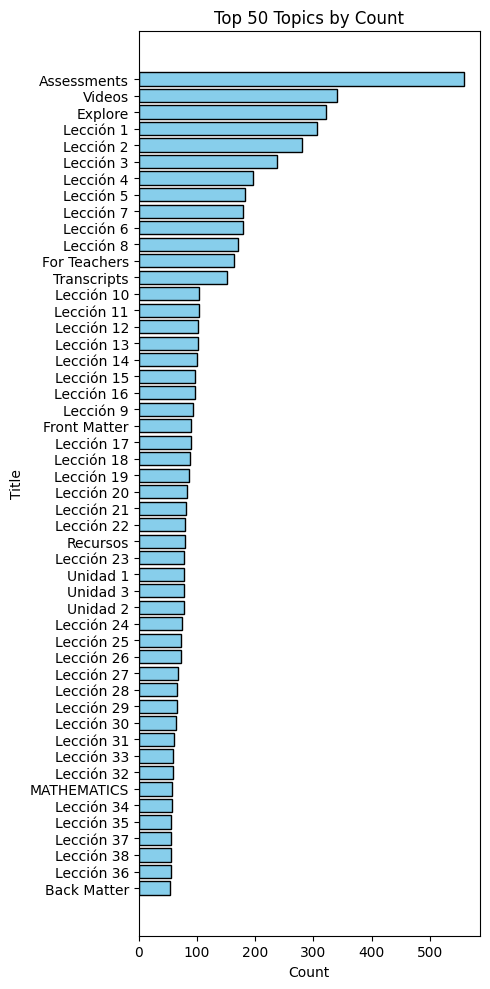

In [64]:
plot_top_n(dataframe=topics, column_name='title')

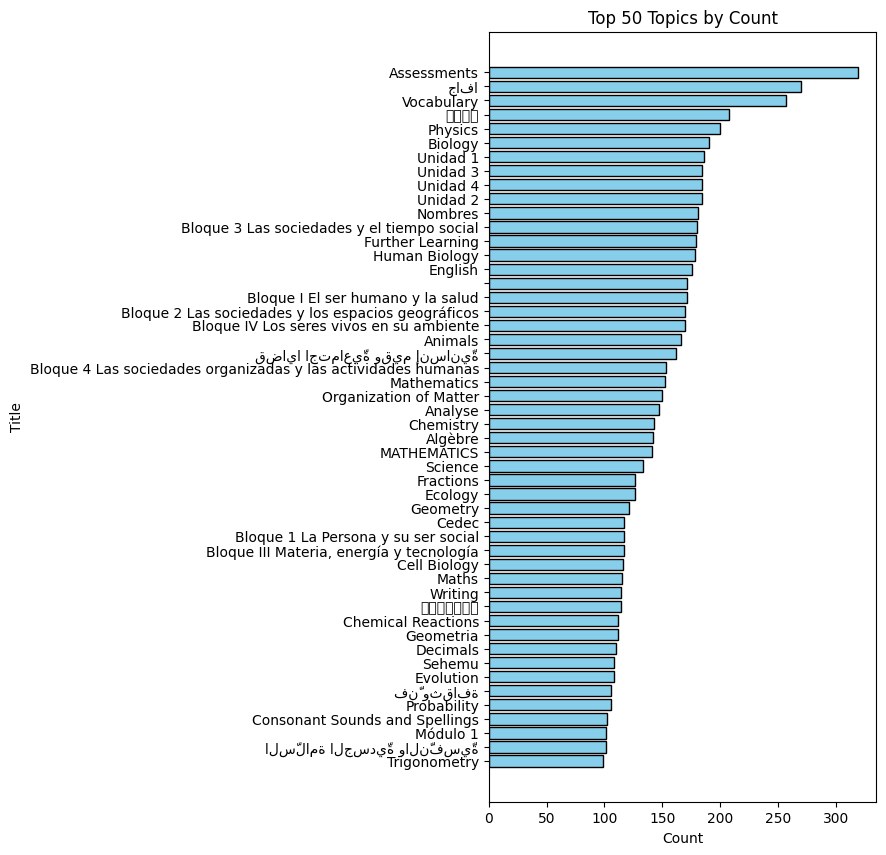

In [65]:
plot_top_n(dataframe=topics, column_name='parent_title')

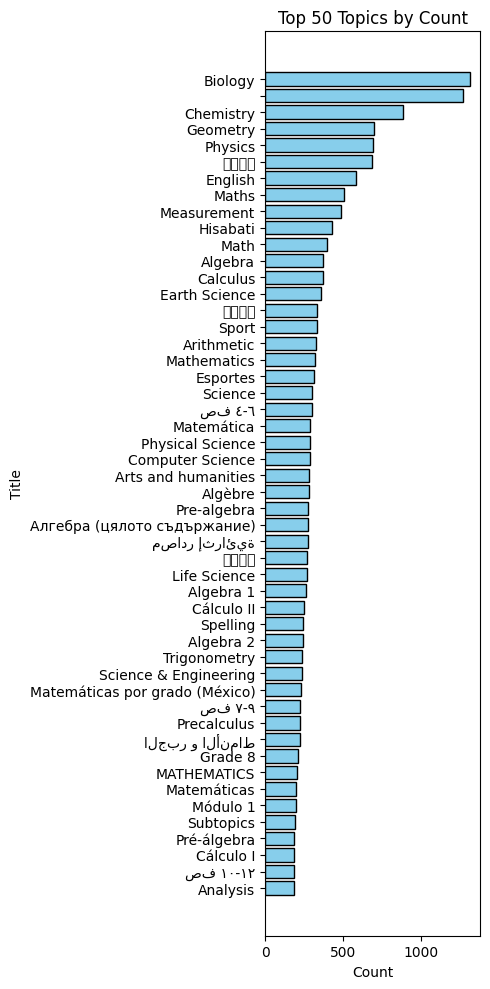

In [66]:
plot_top_n(dataframe=topics, column_name='grandpa_title')

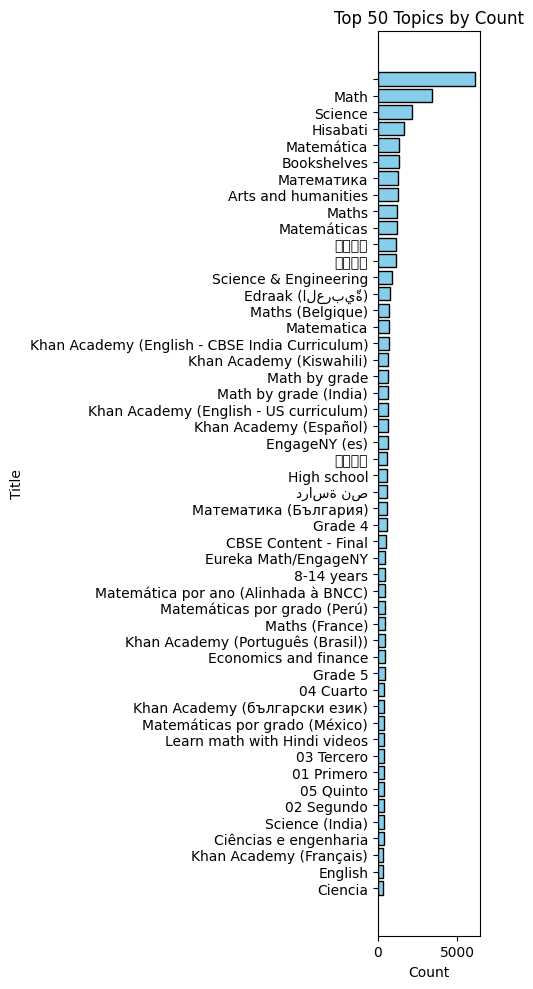

In [67]:
plot_top_n(dataframe=topics, column_name='ggrandpa_title')

# Some initial findings on topics

The distribution of the topics range from a well organized lecuture format (Lecctíon n) and slowly progresses to a more high level classfication method, such as Math, Science, and similar high-level categories.

In [68]:
lang_list = content['language'].unique().tolist()
len(lang_list)

27

In [69]:
import math


In [77]:

def plot_language_pie_charts(content, lang_list, n_cols=3):
    """
    Plots pie charts for content distribution by language.

    Parameters:
    - content (DataFrame): DataFrame containing the data.
    - lang_list (list): List of languages to plot.
    - n_cols (int): Number of columns in the grid. Default is 3.
    - figsize (tuple): Size of the overall figure. Default is (15, 8).

    Returns:
    - None: Displays the pie charts.
    """
    # Calculate the number of rows needed
    n_rows = math.ceil(len(lang_list) / n_cols)

    # Create subplots
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 4))
    axes = axes.flatten()  # Flatten to iterate easily

    # Iterate through each language and create a pie chart
    for i, lang in enumerate(lang_list):
        # Filter data for the current language
        lang_data = content[content['language'] == lang]

        # Get distribution of the 'kind' column
        kind_counts = lang_data['kind'].value_counts()

        # Create pie chart
        axes[i].pie(kind_counts, labels=kind_counts.index, autopct='%1.1f%%', startangle=140)
        axes[i].set_title(f"Content Distribution for {lang.upper()}", fontsize=16)

    # Hide unused subplots if any
    for j in range(len(lang_list), len(axes)):
        axes[j].axis('off')

    # Adjust layout and display the plot
    plt.tight_layout()
    plt.show()

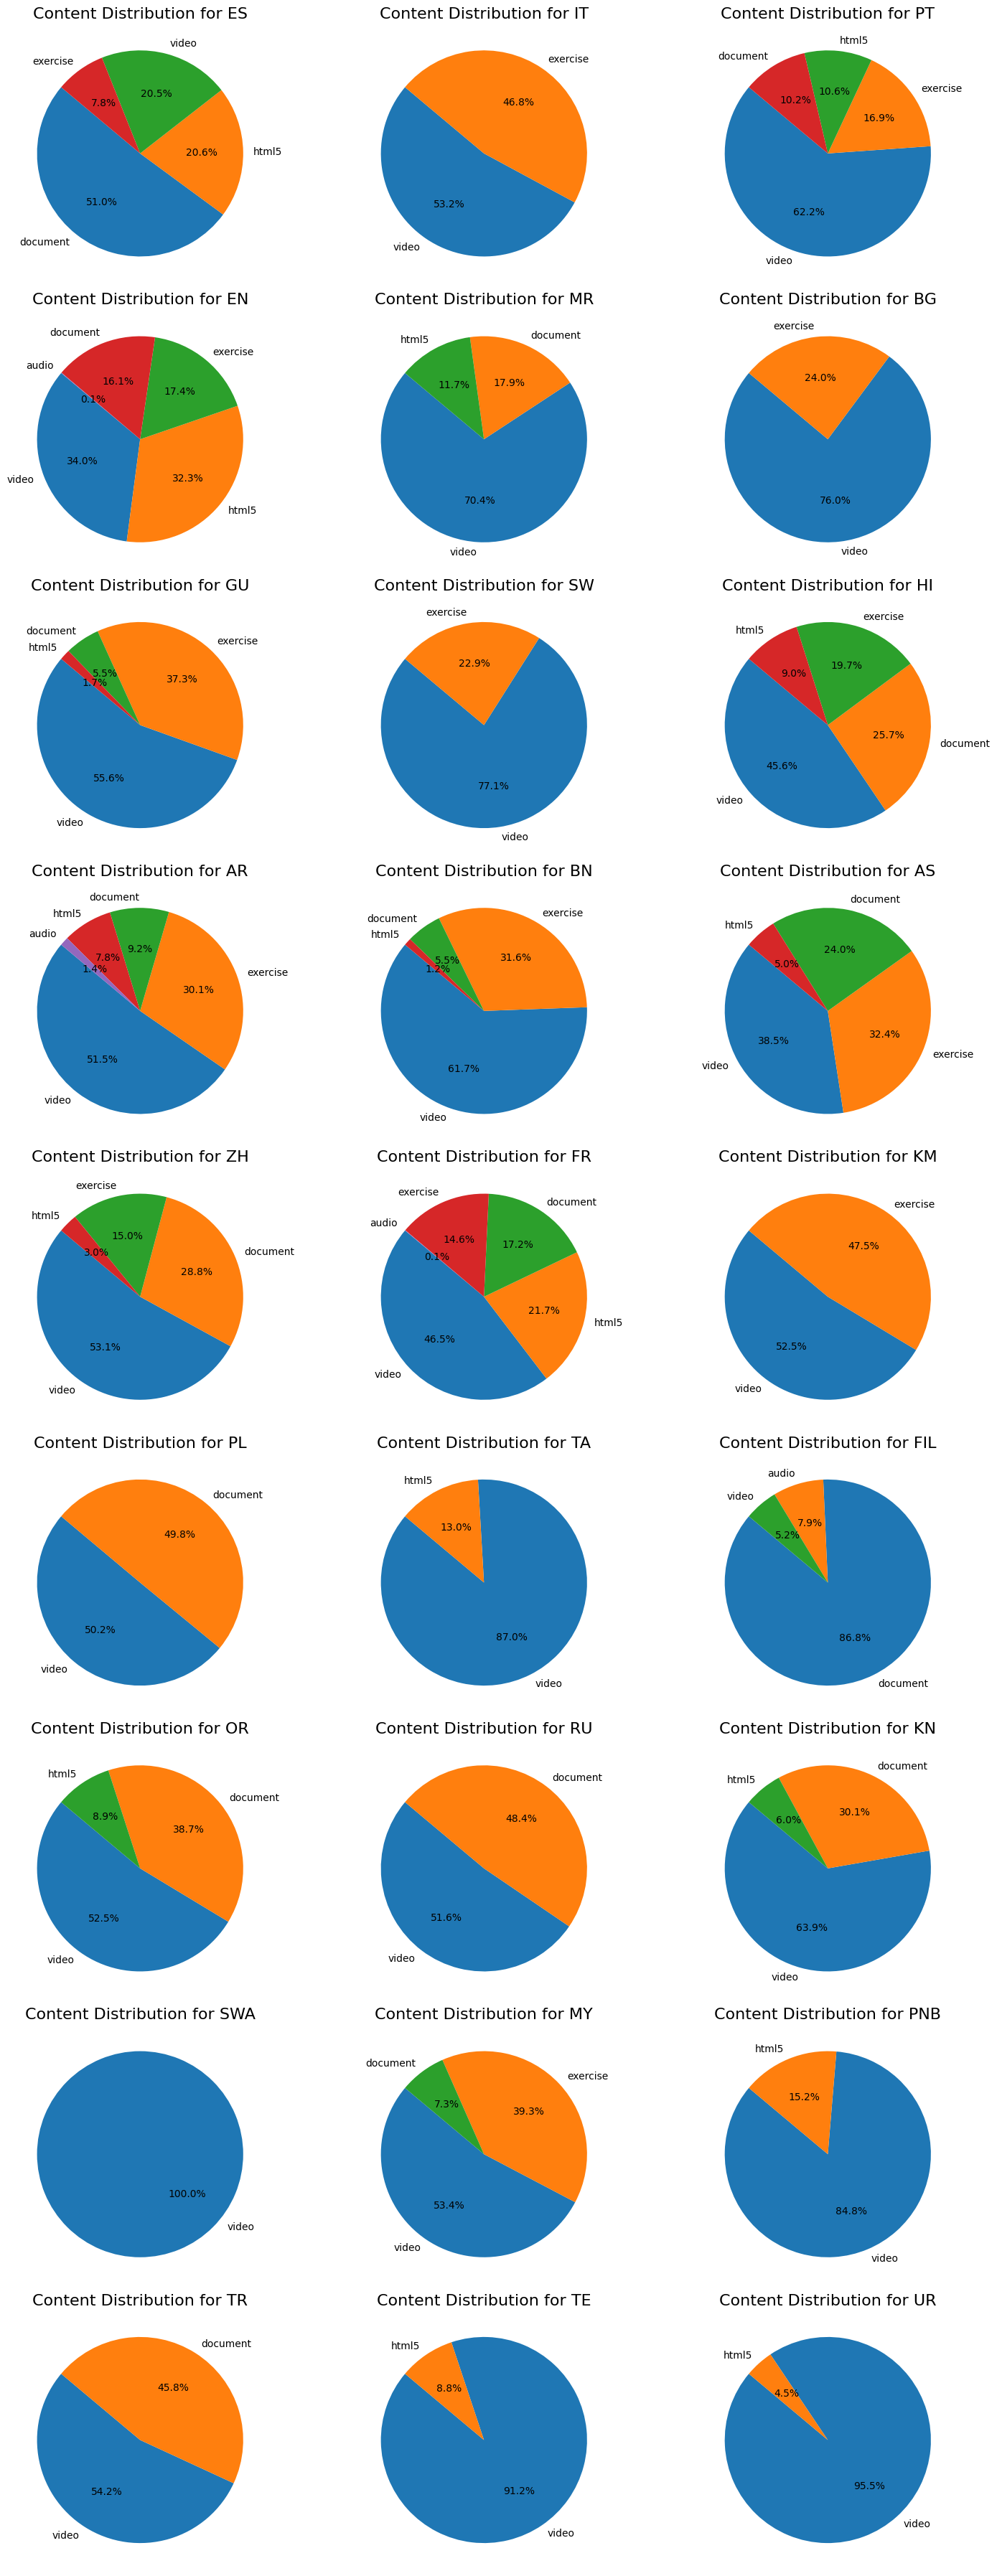

In [78]:
plot_language_pie_charts(content, lang_list, n_cols=3)


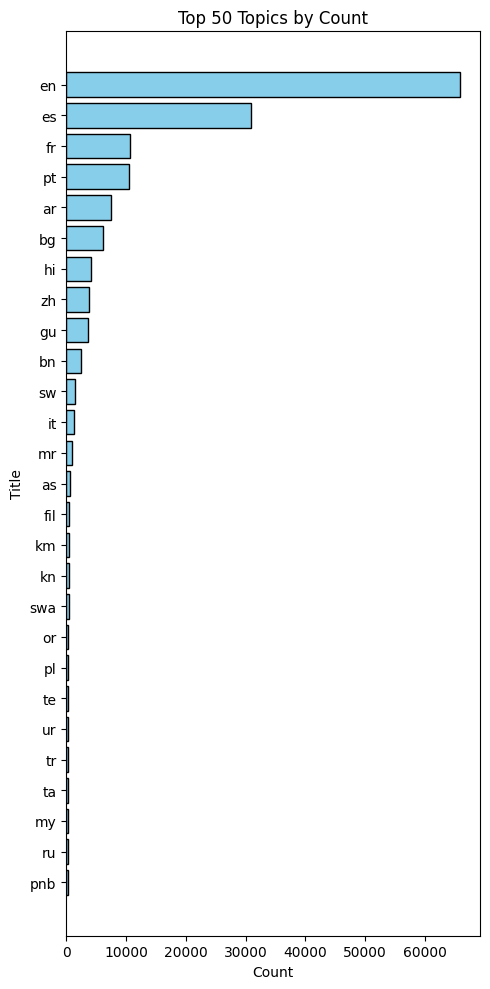

In [71]:
plot_top_n(dataframe=content, column_name='language')

# Findings for the Content Dataframe

It seems like the most important pie charts to look at are the English, French, Spanish, and Portuguese languages, which constitute the bulk of the topics dataset.

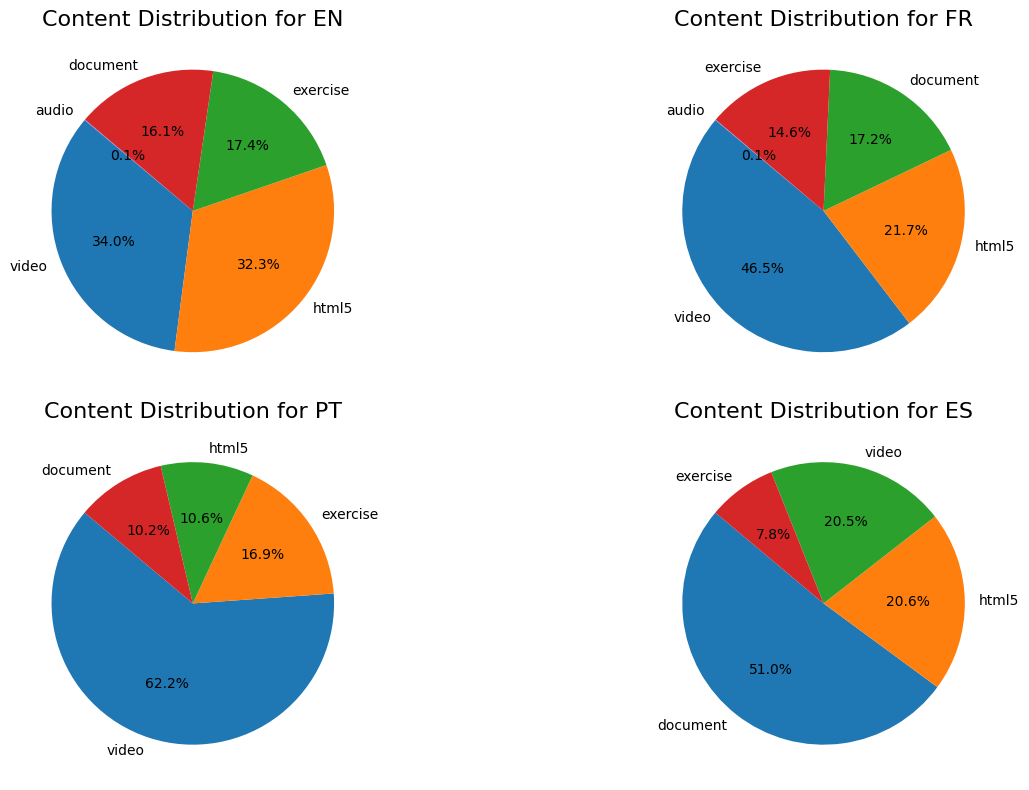

In [80]:
plot_language_pie_charts(content, lang_list=['en', 'fr', 'pt', 'es'], n_cols=2)


From this, we can see that most of the content is actually video for English, French, and Portuguese, while the Spanish content mostly consists of documents and text-based material. Exercises are consistently unpopular amongst the content distribution with it ranking low, while audio is extremely rare.

In [95]:
print(correlations.shape, content.shape, topics.shape)

(61517, 2) (154047, 12) (76972, 16)


# As for the Relationship between Topic Categories and Matching Content Items

There are usually a few contents pieces that belong to each item, which means that topics will usually have a few pieces of materials that it accounts for.

In [106]:
c = correlations.iloc[11].to_dict()
c

{'topic_id': 't_0014be0167f3',
 'content_ids': 'c_2ae5bd6b746a c_370dec1b1ed5 c_5183486b4c6d c_e0ff9325b96d'}

In [107]:
topics[topics['id'] == c['topic_id']]

,id,title,description,channel,category,level,language,parent,has_content,parent_title,grandpa,grandpa_title,ggrandpa,ggrandpa_title,chapter,t
16,t_0014be0167f3,折旧和摊销,你如何解释“用完”的东西或应随着时间摊销的成本。本教程将为你提供答案。折旧和摊销听起来很“高...,f83dcf,source,4,zh,t_05757e2f8841,True,会计和财务报表,t_bd070b953e5c,金融和资本市场,t_6fafdaa3e60c,经济和金融,NaN,折旧和摊销 @ 会计和财务报表 @ 金融和资本市场 @ 经济和金融 | 你如何解释“用完”的...


In [117]:
content_ids = c['content_ids'].split()
df = content[content['id'].isin(content_ids)]
df

,id,title,description,kind,text,language,copyright_holder,license,title_length,description_length,t,chapter
25880,c_2ae5bd6b746a,把购买卡车的成本直接计提为一次性费用，会导致财报无法正确反映企业经营状况,把购买卡车的成本算作一次性的费用，会导致损益表看起来很异常\n\n,video,NaN,zh,NaN,NaN,36.0,31,把购买卡车的成本直接计提为一次性费用，会导致财报无法正确反映企业经营状况 | video |...,NaN
33174,c_370dec1b1ed5,现金流量表中的折旧费,现金流量表中的折旧费\n\n,video,NaN,zh,NaN,NaN,10.0,12,现金流量表中的折旧费 | video | 现金流量表中的折旧费\n\n,NaN
49037,c_5183486b4c6d,摊销和折旧,对比折旧和摊销\n\n,video,NaN,zh,NaN,NaN,5.0,9,摊销和折旧 | video | 对比折旧和摊销\n\n,NaN
135481,c_e0ff9325b96d,对卡车进行折旧,摊销卡车的折旧费\n\n,video,NaN,zh,NaN,NaN,7.0,10,对卡车进行折旧 | video | 摊销卡车的折旧费\n\n,NaN


In [123]:
c = correlations.iloc[111].to_dict()
c

{'topic_id': 't_008ae6ade193',
 'content_ids': 'c_31d43f1390a2 c_3c083f1f3565 c_544637ac9c92 c_681e32474a5b c_939144b13e41 c_c7fabd19036d'}

In [124]:
topics[topics['id'] == c['topic_id']]

,id,title,description,channel,category,level,language,parent,has_content,parent_title,grandpa,grandpa_title,ggrandpa,ggrandpa_title,chapter,t
146,t_008ae6ade193,Assessments,NaN,274269,supplemental,5,en,t_34ee4c2d62c6,True,Conversion of mixed into improper and improper...,t_89eebae7af2e,4. Operations on fractions,t_a04082cb8b65,G6,NaN,Assessments @ Conversion of mixed into imprope...


In [125]:
content_ids = c['content_ids'].split()
df = content[content['id'].isin(content_ids)]
df

,id,title,description,kind,text,language,copyright_holder,license,title_length,description_length,t,chapter
30032,c_31d43f1390a2,Level 1: Convert an Improper Fraction into a M...,v0.1,exercise,NaN,en,NaN,NaN,57.0,4,Level 1: Convert an Improper Fraction into a M...,NaN
36143,c_3c083f1f3565,Level 1: Convert a Mixed Number into an Improp...,v0.1,exercise,NaN,en,NaN,NaN,57.0,4,Level 1: Convert a Mixed Number into an Improp...,NaN
50768,c_544637ac9c92,Level 2: Convert a Mixed Number into an Improp...,v0.1,exercise,NaN,en,NaN,NaN,57.0,4,Level 2: Convert a Mixed Number into an Improp...,NaN
62644,c_681e32474a5b,Level 3: Convert an Improper Fraction into a M...,v0.1,exercise,NaN,en,NaN,NaN,57.0,4,Level 3: Convert an Improper Fraction into a M...,NaN
88765,c_939144b13e41,Level 3: Convert a Mixed Number into an Improp...,v0.1,exercise,NaN,en,NaN,NaN,57.0,4,Level 3: Convert a Mixed Number into an Improp...,NaN
120384,c_c7fabd19036d,Level 2: Convert an Improper Fraction into a M...,v0.1,exercise,NaN,en,NaN,NaN,57.0,4,Level 2: Convert an Improper Fraction into a M...,NaN


It seems that the relationship between topics and their content is that the content is usually a subgroup of the category. In the Chinese example where the topic is about 折旧和摊销, it seems to relate to scrapping old trucks and how to deal with the issue of Depreciation and Amortization of the vehicles.

In the second example, while the topic itself was not very descriptive (Assessment), the parent title of Conversion of mixed into improper and improper.. as well as the grandpa title of Operations on fractions. These two shed more light on the individual contents and their purpose.

With this, we kind of get a feel of how content is nested under the topics and how the individual contents are all similar to each other.

#EDA Complete